## 1日の中で時間ごとの歩数の遷移をモデル化する

In [157]:
%matplotlib inline
import random
import numpy
import matplotlib.pylab as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

### 杉山先生がランダム9人の10日間の歩数を時間ごとに出してはった

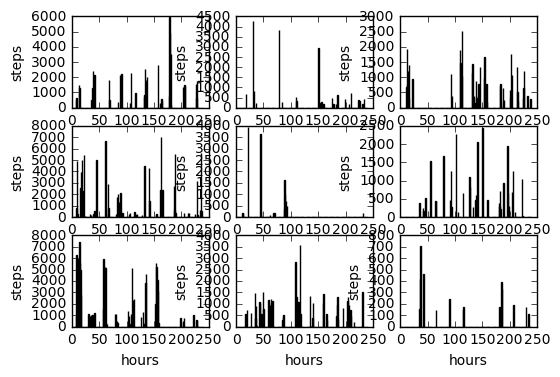

In [3]:
f = open('datasets.npz', 'rb')
dataset = numpy.load(f)
X = dataset['all']

f, axes = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        datasets = X[random.randint(0, X.shape[0] - 1)]
        # print 'dataset: ', dataset
        axes[i][j].bar(xrange(240), datasets)
        axes[i][j].set_xlabel('hours')
        axes[i][j].set_ylabel('steps')
plt.show()

### 10日の中で1時間ごとの歩数のヒストグラムを作成

In [4]:
#print X.shape
daily_steps = X
#print daily_step.shape
daily_step = daily_steps[daily_steps != 0.0]
#daily_steps.reshape(-1,)
#numpy.ravel(daily_steps)
#print daily_steps.shape

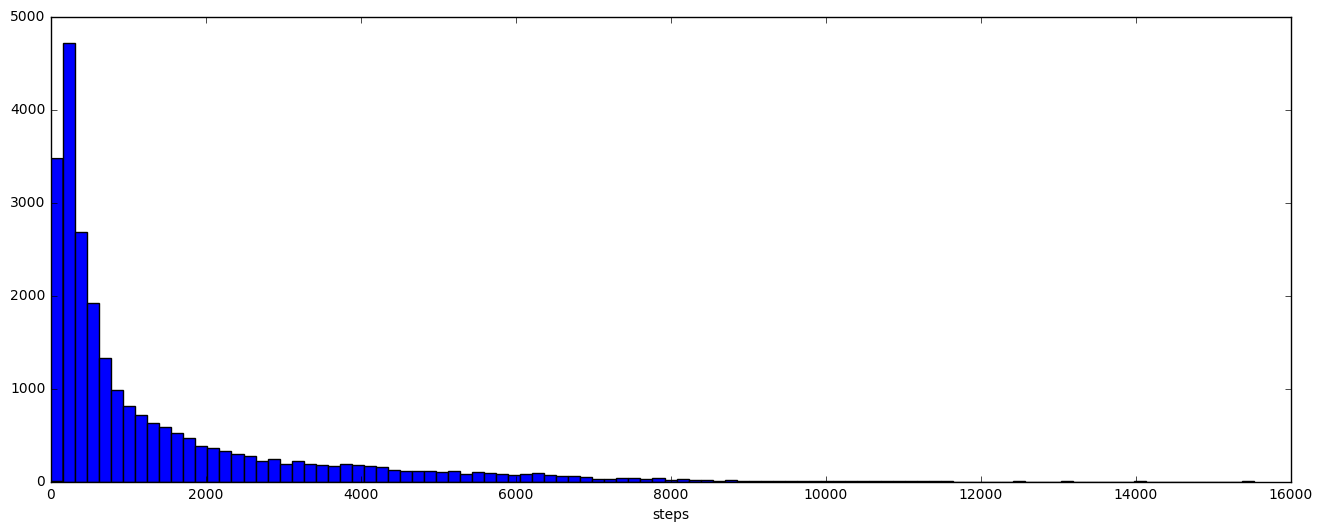

In [5]:
plt.figure(figsize=(16,6))
plt.hist(daily_step, bins=100)
plt.xlabel('steps')
#plt.xticks([156, 495, 1008, 1717, 2742, 4030, 5609, 8166])
plt.show()

In [6]:
print numpy.max(daily_step)

15520.7


### 歩数を人の状態として捉えるためにK-meansでクラスタリング

In [7]:
import scipy.cluster

#daily_step_1d = daily_step.reshape((-1, ))
#print daily_step_1d.shape
#とりあえずk=8でやる
codebook, destortion = scipy.cluster.vq.kmeans(daily_step, 8)
#ちなみに16クラスタ、32クラスタでもクラスタリング可能っぽい
#codebook, destortion = scipy.cluster.vq.kmeans(daily_step_1d, 8)
codebook = numpy.sort(codebook)
print codebook

#code, dist = scipy.cluster.vq.vq(daily_step_1d, codebook)
#print code, dist

[  163.2618103    491.51968384   980.38720703  1659.49145508  2621.05834961
  3955.75561523  5763.12988281  8338.31445312]


In [8]:
import collections

code, dist = scipy.cluster.vq.vq(daily_step, codebook)
print collections.Counter(code)

Counter({0: 8527, 1: 5310, 2: 3122, 3: 2547, 4: 1883, 5: 1560, 6: 1148, 7: 380})


In [9]:
clus0 = []
clus1 = []
clus2 = []
clus3 = []
clus4 = []
clus5 = []
clus6 = []
clus7 = []

for i, j in zip(code, daily_step):
    if i == 0:
        clus0.append(j)
    elif i == 1:
        clus1.append(j)
    elif i == 2:
        clus2.append(j)
    elif i == 3:
        clus3.append(j)
    elif i == 4:
        clus4.append(j)
    elif i == 5:
        clus5.append(j)
    elif i == 6:
        clus6.append(j)
    elif i == 7:
        clus7.append(j)

In [10]:
print max(clus7)

15520.7


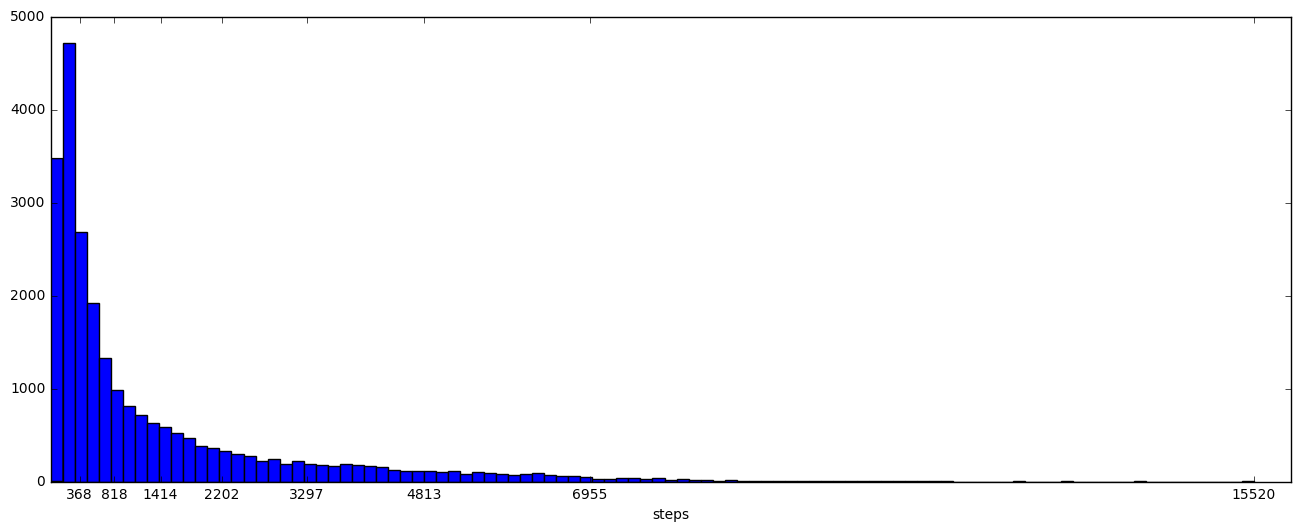

In [11]:
plt.figure(figsize=(16,6))
plt.hist(daily_step, bins=100)
plt.xlabel('steps')
plt.xticks([368, 818, 1414, 2202, 3297, 4813, 6955, 15520])
plt.show()

### 1日8000歩達成した人と未完の人を分けて１日のクラスタ遷移を見る
使ってない(7/7現在)

In [12]:
#まず1日8000歩達成した人としていない人を分けよう
kampo_daily = numpy.zeros((0, 24))
mikan_daily = numpy.zeros((0, 24))

for step in daily_step:
    if numpy.sum(step) >= 8000:
        kampo_daily = numpy.vstack((kampo_daily, step))
        
    else:
        mikan_daily = numpy.vstack((mikan_daily, step))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [238]:
kampo_tra = numpy.zeros((0, 24))
mikan_tra = numpy.zeros((0, 24))

#1日8000歩以上歩いた人
for name in kampo_daily:
    code, dist = scipy.cluster.vq.vq(name, codebook)
    kampo_tra = numpy.vstack((kampo_tra, code))
    
for name in mikan_daily:
    code, dist = scipy.cluster.vq.vq(name, codebook)
    mikan_tra = numpy.vstack((mikan_tra, code))
    
print "kampo user: "
for i in range(3):
    print kampo_tra[random.randint(0, kampo_tra.shape[0] - 1)]

print "mikan user: "
for i in range(3):
    print mikan_tra[random.randint(0, mikan_tra.shape[0] - 1)]

kampo user: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  7.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  3.  0.  0.  0.  6.
  0.  0.  5.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  6.  6.  1.  0.  0.]
mikan user: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.]


### 10日間の中で遷移パターンに落とし込む

In [13]:
# まずは10日の1時間ごとのデータを24時間ごとに分割
test_ary = daily_steps
#print test_ary.shape[0]
test_ary = test_ary.reshape((-1, 24))
print daily_steps.shape
print test_ary.shape

(704, 240)
(7040, 24)


In [14]:
# 24時間ごとのデータに対して遷移パターンを作成
daily_trans = numpy.zeros((0, 24))

for name in test_ary:
    code, dist = scipy.cluster.vq.vq(name, codebook)
    daily_trans = numpy.vstack((daily_trans, code))
    
print daily_trans.shape
#print test_ary[1]
#print daily_trans[1]

(7040, 24)


In [16]:
# 編集距離を用いてward法でクラスタリング
import sys
import Levenshtein
sys.setrecursionlimit(10000)

pdis = scipy.spatial.distance.pdist(daily_trans, lambda i, j: Levenshtein.distance(','.join(map(str,i)), ','.join(map(str,j))))
# resultはscipyのward法でクラスタリングした結果
result = scipy.cluster.hierarchy.ward(pdis)

In [19]:
# クラスタリング結果をpickleに保存
import pickle
with open('ward_result.pkl', mode='wb') as f:
    pickle.dump(result, f)

In [415]:
print daily_trans.shape
print result.shape

(7040, 24)


/var/lib/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [26]:
with open('ward_result.pkl', mode='rb') as f:
    result = pickle.load(f)
print result

[[  0.00000000e+00   2.00000000e+00   0.00000000e+00   2.00000000e+00]
 [  3.00000000e+00   7.04000000e+03   0.00000000e+00   3.00000000e+00]
 [  7.00000000e+00   7.04100000e+03   0.00000000e+00   4.00000000e+00]
 ..., 
 [  1.40690000e+04   1.40740000e+04   5.98651155e+01   5.33900000e+03]
 [  1.40630000e+04   1.40760000e+04   6.26414233e+01   5.81700000e+03]
 [  1.40750000e+04   1.40770000e+04   8.30937338e+01   7.04000000e+03]]


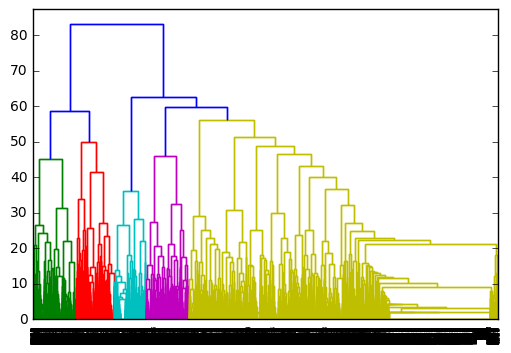

In [36]:
# デンドログラムで見てみたら、まぁまぁいい感じに分かれてそう
dendro = scipy.cluster.hierarchy.dendrogram(result)
plt.xlabel=("datas")
plt.ylabel=("distance")
scipy.cluster.hierarchy.dendrogram(result)
plt.show()
#scipy.cluster.hierarchy.dendrogram(result, p=10, truncate_mode='lastp')

### このクラスタリングが人が見てわかるクラスタリングになっているか確認する

In [58]:
# とりあえずデンドロの色分けにしたがって5クラスタでデータ分ける
#print scipy.cluster.hierarchy.leaves_list(result).shape
#print dendro["color_list"]
#cutree = scipy.cluster.hierarchy.cut_tree(result, n_clusters=[5, 2])
#print cutree.shap
tot = scipy.cluster.hierarchy.to_tree(result)
print tot

<scipy.cluster.hierarchy.ClusterNode instance at 0x7fcde7116a70>


In [51]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

### テスト用のデータ作ろう

全体の10%の人数で4時間ごとに揃ったデータを作成(70人、4時、8時、12時、16時、20時のときのデータ)

In [161]:
# 元データtest_ary shape=(7040, 24)
# まずはランダムに70人のデータ取ってこよう
target_data = numpy.zeros((0, 24))
for i in range(70):
    rand = random.randint(0, test_ary.shape[0])
    target_data = numpy.vstack((target_data, test_ary[rand, :]))
    
#print target_data.shape

# target_dataを4時間おきの不完全データにする。
target_4am = target_data[:, :4]
target_8am = target_data[:, :8]
target_12pm = target_data[:, :12]
target_4pm = target_data[:, :16]
target_8pm = target_data[:, :20]

### 総当たりで似ているパターンを探してくるコード　対照群A

In [210]:
# テストデータの部分が同じ、かつ8000歩を達成しているパターンをそれぞれ10個ずつ取ってくる
def matched_data(daily, sample):
    similar_dict = {}
    count = 0
    
    for target in sample:
        similar_data = numpy.zeros((0, 24))
        for ary in daily:
            #テストパターンと一致しており、かつ8000歩達成
            if (target == ary[:target.shape[0]]).all() and sum(ary) >= 8000:
                similar_data = numpy.vstack((similar_data, ary))
        #候補が10個以上の時はランダムに10個まで絞り込む
        if similar_data.shape[0] > 10:
            similar = numpy.zeros((0, 24))
            for i in range(10):
                similar = numpy.vstack((similar, similar_data[random.randint(0, similar_data.shape[0]-1)]))
            similar_dict[count] = similar
            count += 1
        else:
            similar_dict[count] = similar_data
            count += 1
    
    return similar_dict

In [213]:
similar_dict_4am = matched_data(test_ary, target_4am)
similar_dict_8am = matched_data(test_ary, target_8am)
similar_dict_12pm = matched_data(test_ary, target_12pm)
similar_dict_4pm = matched_data(test_ary, target_4pm)
similar_dict_8pm = matched_data(test_ary, target_8pm)
#print similar_dict_4am[0]
#print similar_dict_8pm[0]

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   4.99000000e+02
    0.00000000e+00   0.00000000e+00   6.74450146e+03   3.51498627e+02
    2.16036230e+03   6.22062744e+03   4.36017480e+03   1.47835587e+02
    0.00000000e+00   0.00000000e+00   1.58000000e+02   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   6.05361279e+03   1.05438721e+03   6.32536523e+03
    1.23634621e+02   0.00000000e+00   9.02000000e+02   0.00000000e+00
    6.66595398e+02   4.04610246e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.55927271e+03   4.09058008e+03   2.45147293e+02   0.00000000e+00
    0.00000000e+00

In [253]:
#似てる上位10個ずつは出せたから、元データとの距離を計算
dist_4am_dict = {}
for i, target in enumerate(target_data):
    dist_4am = numpy.zeros((0, 1))
    
    for similar in similar_dict_4am[i]:
        summer = 0
        
        for data1, data2 in zip(target, similar):
            #summer += abs(data1 - data2)
            summer += data1 - data2
            #dist_4am = numpy.append(dist_4am, numpy.linalg.norm(similar-target))
        dist_4am = numpy.append(dist_4am, summer)
    dist_4am_dict[i] = dist_4am

length = 0
result = 0
summer = 0
for i in range(70):
    summer += sum(dist_4am_dict[i])
    length += len(dist_4am_dict[i])
print abs(summer/length)
#print dist_4am.shape
#print target_data.shape
totaldist_random = abs(summer/length)

8364.62171207


In [254]:
dist_8am_dict = {}
for i, target in enumerate(target_data):
    dist_8am = numpy.zeros((0, 1))
    
    for similar in similar_dict_8am[i]:
        summer = 0
        
        for data1, data2 in zip(target, similar):
            summer += data1 - data2
            #dist_4am = numpy.append(dist_4am, numpy.linalg.norm(similar-target))
        dist_8am = numpy.append(dist_8am, summer)
    dist_8am_dict[i] = dist_8am

length = 0
result = 0
summer = 0
for i in range(70):
    summer += sum(dist_8am_dict[i])
    length += len(dist_8am_dict[i])
print abs(summer/length)
totaldist_random = numpy.append(totaldist_random, abs(summer/length))

dist_12pm_dict = {}
for i, target in enumerate(target_data):
    dist_12pm = numpy.zeros((0, 1))
    
    for similar in similar_dict_12pm[i]:
        summer = 0
        
        for data1, data2 in zip(target, similar):
            summer += data1 - data2
            #dist_4am = numpy.append(dist_4am, numpy.linalg.norm(similar-target))
        dist_12pm = numpy.append(dist_12pm, summer)
    dist_12pm_dict[i] = dist_12pm

length = 0
result = 0
summer = 0
for i in range(70):
    summer += sum(dist_12pm_dict[i])
    length += len(dist_12pm_dict[i])
print abs(summer/length)
totaldist_random = numpy.append(totaldist_random, abs(summer/length))

dist_4pm_dict = {}
for i, target in enumerate(target_data):
    dist_4pm = numpy.zeros((0, 1))
    
    for similar in similar_dict_4pm[i]:
        summer = 0
        
        for data1, data2 in zip(target, similar):
            summer += data1 - data2
            #dist_4am = numpy.append(dist_4am, numpy.linalg.norm(similar-target))
        dist_4pm = numpy.append(dist_4pm, summer)
    dist_4pm_dict[i] = dist_4pm

length = 0
result = 0
summer = 0
for i in range(70):
    summer += sum(dist_4pm_dict[i])
    length += len(dist_4pm_dict[i])
print abs(summer/length)
totaldist_random = numpy.append(totaldist_random, abs(summer/length))

dist_8pm_dict = {}
for i, target in enumerate(target_data):
    dist_8pm = numpy.zeros((0, 1))
    
    for similar in similar_dict_8pm[i]:
        summer = 0
        
        for data1, data2 in zip(target, similar):
            summer += data1 - data2
            #dist_4am = numpy.append(dist_4am, numpy.linalg.norm(similar-target))
        dist_8pm = numpy.append(dist_8pm, summer)
    dist_8pm_dict[i] = dist_8pm

length = 0
result = 0
summer = 0
for i in range(70):
    summer += sum(dist_8pm_dict[i])
    length += len(dist_8pm_dict[i])
print abs(summer/length)
totaldist_random = numpy.append(totaldist_random, abs(summer/length))

8201.69613362
8391.25694756
8538.5722315
7657.72230101


<Container object of 5 artists>

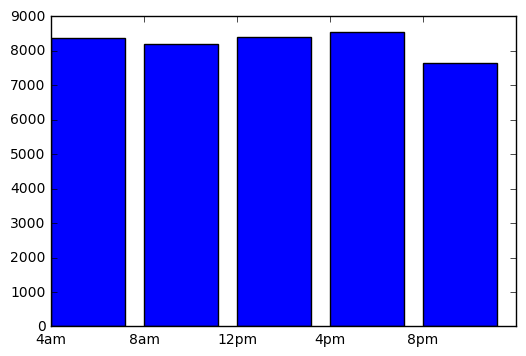

In [257]:
# 全体の平均を棒グラフで表示
labels = ['4am', '8am', '12pm', '4pm', '8pm']
plt.bar([1,2,3,4,5], totaldist_random, tick_label=labels)

### 量子化せずにクラスタリングした中から似ているパターンを探してくる　対照群B

In [156]:
# 対象データはsample_data
# まず量子化していないデータをクラスタリングする with ward法　ユークリッド距離
for linkage in ('ward'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clus = clustering.fit(test_ary)
    print("%s : %.2fs" % (linkage, time() - t0))
    print clus

NameError: name 'AgglomerativeClustering' is not defined

In [111]:
rand_ary = sample_data[:6]
#print rand_ary
shape_num = rand_ary.shape[0]
# sample_dataが不完全な場合は足りない部分は0で補完？
for i in range(24 - shape_num):
    rand_ary = numpy.append(rand_ary, 0)
    
print rand_ary
similar_ary = match_data(test_ary, rand_ary)
print similar_ary

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]


ValueError: all the input arrays must have same number of dimensions